In [3]:
import pandas as pd

df = pd.read_csv("../data/curated/income_forecasted.csv")

,year,suburb,hi_1_149_tot,hi_150_299_tot,hi_300_399_tot,hi_400_499_tot,hi_500_649_tot,hi_650_799_tot,hi_800_999_tot,hi_1000_1249_tot,hi_1250_1499_tot,hi_1500_1749_tot,hi_1750_1999_tot,hi_2000_2499_tot,hi_2500_2999_tot,hi_3000_3499_tot,hi_3500_3999_tot,hi_4000_more_tot
0,2016,abbotsford,27,72,68,114,95,120,175,187,239,210,223,502,255,216,238,407
1,2017,abbotsford,27,66,70,115,104,118,172,201,252,218,233,536,263,239,227,503
2,2018,abbotsford,27,60,73,116,113,117,170,215,266,227,243,571,271,262,217,600
3,2019,abbotsford,27,54,76,117,122,115,168,230,280,235,253,605,279,285,206,697
4,2020,abbotsford,27,48,79,118,131,114,166,244,294,244,263,640,287,308,196,794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,2023,yuroke,22,38,67,141,216,302,448,665,842,756,767,1613,993,650,347,670
6260,2024,yuroke,24,41,75,158,243,340,505,749,948,853,865,1819,1124,735,391,757
6261,2025,yuroke,27,45,83,175,271,378,562,833,1055,950,963,2025,1255,820,435,844
6262,2026,yuroke,29,49,91,192,299,416,618,917,1162,1047,1061,2231,1386,905,479,931


## Change the dataframe to be suitable for processing

In [6]:
import re

# Function to extract numbers from column names and calculate their average
def rename_col(col):
    # Search for two numbers separated by an underscore
    match = re.search(r'(\d+)_(\d+)', col)
    if match:
        # Calculate the average of the two numbers
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        avg = (num1 + num2) // 2  # Integer division to keep the average as an integer
        return f'hi_{avg}_avg'
    else:
        return col  # If no match, keep the original column name

# Rename the columns in the DataFrame
df.columns = [rename_col(col) for col in df.columns]

# Function to extract the first number from column names
def extract_number(col):
    # Search for numbers in the column name
    match = re.search(r'(\d+)', col)
    if match:
        return match.group(1)  # Return the first number found
    else:
        return col  # If no number is found, keep the original column name

# Rename the columns in the DataFrame
df.columns = [extract_number(col) for col in df.columns]


df

,year,suburb,75,224,349,449,574,724,899,1124,1374,1624,1874,2249,2749,3249,3749,4000
0,2016,abbotsford,27,72,68,114,95,120,175,187,239,210,223,502,255,216,238,407
1,2017,abbotsford,27,66,70,115,104,118,172,201,252,218,233,536,263,239,227,503
2,2018,abbotsford,27,60,73,116,113,117,170,215,266,227,243,571,271,262,217,600
3,2019,abbotsford,27,54,76,117,122,115,168,230,280,235,253,605,279,285,206,697
4,2020,abbotsford,27,48,79,118,131,114,166,244,294,244,263,640,287,308,196,794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,2023,yuroke,22,38,67,141,216,302,448,665,842,756,767,1613,993,650,347,670
6260,2024,yuroke,24,41,75,158,243,340,505,749,948,853,865,1819,1124,735,391,757
6261,2025,yuroke,27,45,83,175,271,378,562,833,1055,950,963,2025,1255,820,435,844
6262,2026,yuroke,29,49,91,192,299,416,618,917,1162,1047,1061,2231,1386,905,479,931


In [21]:
# Assuming your DataFrame is named df
census_df = df[df['year'].isin([2016, 2021])]

# Display the filtered DataFrame
census_df

,year,suburb,75,224,349,449,574,724,899,1124,1374,1624,1874,2249,2749,3249,3749,4000
0,2016,abbotsford,27,72,68,114,95,120,175,187,239,210,223,502,255,216,238,407
5,2021,abbotsford,28,42,82,119,140,113,164,259,308,253,274,675,295,332,186,891
12,2016,aberfeldie,70,134,213,461,345,528,607,759,719,618,555,1150,713,504,556,1294
17,2021,aberfeldie,35,62,102,250,175,246,271,363,384,342,286,638,397,413,280,1394
24,2016,airport west,24,56,90,200,120,250,198,243,251,186,150,316,220,135,100,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,2021,yarriambiack,23,49,103,316,164,260,204,232,203,135,148,239,131,84,44,116
6240,2016,yea,20,57,67,138,75,150,106,119,118,72,63,106,52,21,25,39
6245,2021,yea,15,32,60,140,80,139,128,137,118,87,82,155,94,62,37,106
6252,2016,yuroke,5,14,11,26,22,37,53,80,102,81,83,171,76,58,39,63


In [23]:
import numpy as np

# Convert the column names (income values) to integers
income_columns = census_df.columns[2:]  # Skipping 'year' and 'suburb' columns

# Rename income columns to integers for calculations
income_columns_int = [int(col) for col in income_columns]
census_df.columns = list(df.columns[:2]) + income_columns_int

# Function to calculate weighted average with a check for zero sum of weights
def weighted_avg(row, income_columns_int):
    total_people = row.sum()
    if total_people == 0:  # If all values in the row are 0, return 0 or np.nan
        return np.nan
    else:
        return np.average(income_columns_int, weights=row)

# Apply the function to calculate the weighted average for each row
census_df['weighted_avg_income'] = census_df[income_columns_int].apply(lambda row: weighted_avg(row, income_columns_int), axis=1)

# Display the updated DataFrame
census_df

/tmp/ipykernel_49818/2366034794.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_df['weighted_avg_income'] = census_df[income_columns_int].apply(lambda row: weighted_avg(row, income_columns_int), axis=1)


,year,suburb,75,224,349,449,574,724,899,1124,1374,1624,1874,2249,2749,3249,3749,4000,weighted_avg_income
0,2016,abbotsford,27,72,68,114,95,120,175,187,239,210,223,502,255,216,238,407,2141.474269
5,2021,abbotsford,28,42,82,119,140,113,164,259,308,253,274,675,295,332,186,891,2333.773852
12,2016,aberfeldie,70,134,213,461,345,528,607,759,719,618,555,1150,713,504,556,1294,2034.645350
17,2021,aberfeldie,35,62,102,250,175,246,271,363,384,342,286,638,397,413,280,1394,2342.553388
24,2016,airport west,24,56,90,200,120,250,198,243,251,186,150,316,220,135,100,127,1651.007127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,2021,yarriambiack,23,49,103,316,164,260,204,232,203,135,148,239,131,84,44,116,1424.760506
6240,2016,yea,20,57,67,138,75,150,106,119,118,72,63,106,52,21,25,39,1283.982899
6245,2021,yea,15,32,60,140,80,139,128,137,118,87,82,155,94,62,37,106,1586.921875
6252,2016,yuroke,5,14,11,26,22,37,53,80,102,81,83,171,76,58,39,63,1958.085776


In [25]:
# List of column names you want to drop (converted to strings)
columns_to_drop = [75, 224, 349, 449, 574, 724, 899, 1124, 1374, 1624, 1874, 2249, 2749, 3249, 3749, 4000]

# Drop the specified columns from the DataFrame
census_df = census_df.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame
census_df

,year,suburb,weighted_avg_income
0,2016,abbotsford,2141.474269
5,2021,abbotsford,2333.773852
12,2016,aberfeldie,2034.645350
17,2021,aberfeldie,2342.553388
24,2016,airport west,1651.007127
...,...,...,...
6233,2021,yarriambiack,1424.760506
6240,2016,yea,1283.982899
6245,2021,yea,1586.921875
6252,2016,yuroke,1958.085776


In [31]:
# Pivot the DataFrame to have years as columns and suburbs as the index
pivot_df = census_df.pivot(index='suburb', columns='year', values='weighted_avg_income')

# Compute the difference between 2021 and 2016 for each suburb
pivot_df['income_diff'] = pivot_df[2021] - pivot_df[2016]

# Reset the index to get 'suburb' as a column and remove 'year'
result_df = pivot_df[['income_diff']].reset_index()

# Display the final DataFrame without the 'year' header
result_df.columns.name = None

# Display the final DataFrame
result_df

,suburb,income_diff
0,abbotsford,192.299583
1,aberfeldie,307.908038
2,airport west,342.577537
3,albert park,108.310331
4,albion,330.945980
...,...,...
517,yarraville,352.794072
518,yarrawonga,269.088457
519,yarriambiack,244.107978
520,yea,302.938976


In [32]:
# Find the minimum value in the 'income_diff' column
min_value = result_df['income_diff'].min()

# Find the maximum value in the 'income_diff' column
max_value = result_df['income_diff'].max()

# Display the results
print(f"Minimum income difference: {min_value}")
print(f"Maximum income difference: {max_value}")

Minimum income difference: -64.24450010102282
Maximum income difference: 925.2563636363635


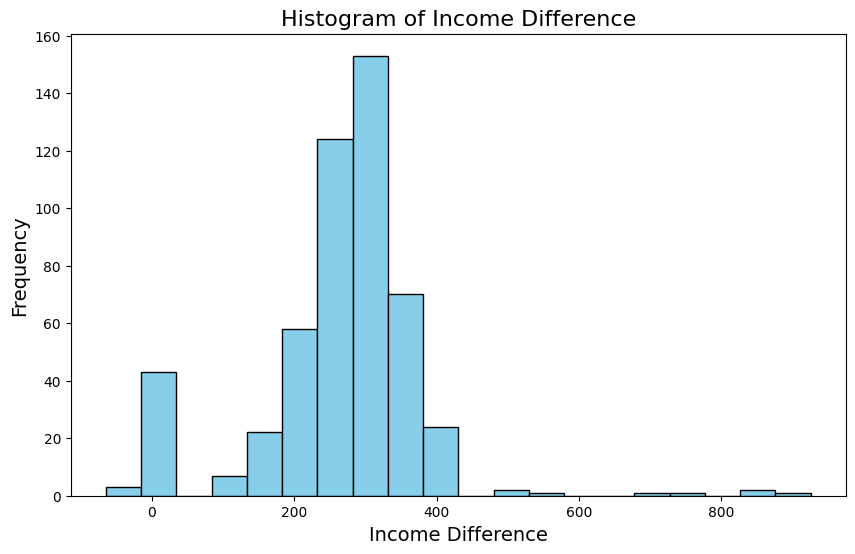

In [34]:
import matplotlib.pyplot as plt


# Plotting a histogram for the 'income_diff' column
plt.figure(figsize=(10, 6))
plt.hist(result_df['income_diff'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Income Difference', fontsize=16)
plt.xlabel('Income Difference', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [37]:
from math import sqrt

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = result_df['income_diff'].quantile(0.25)
Q3 = result_df['income_diff'].quantile(0.75)

# Step 2: Calculate the IQR
IQR = Q3 - Q1

# Step 3: Define the bounds for outliers, since n>100
lower_bound = Q1 - (sqrt(len(result_df) - 0.5)) * IQR
upper_bound = Q3 + (sqrt(len(result_df) - 0.5)) * IQR

# Step 4: Filter the data to remove outliers
filtered_df = result_df[(result_df['income_diff'] >= lower_bound) & (result_df['income_diff'] <= upper_bound)]

# Display the filtered DataFrame without outliers
filtered_df

,suburb,income_diff
0,abbotsford,192.299583
1,aberfeldie,307.908038
2,airport west,342.577537
3,albert park,108.310331
4,albion,330.945980
...,...,...
517,yarraville,352.794072
518,yarrawonga,269.088457
519,yarriambiack,244.107978
520,yea,302.938976


/tmp/ipykernel_49818/2246958761.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_diff', y='suburb', data=top_5_combined, palette=['green' if x in top_5_highest['suburb'].values else 'red' for x in top_5_combined['suburb']])


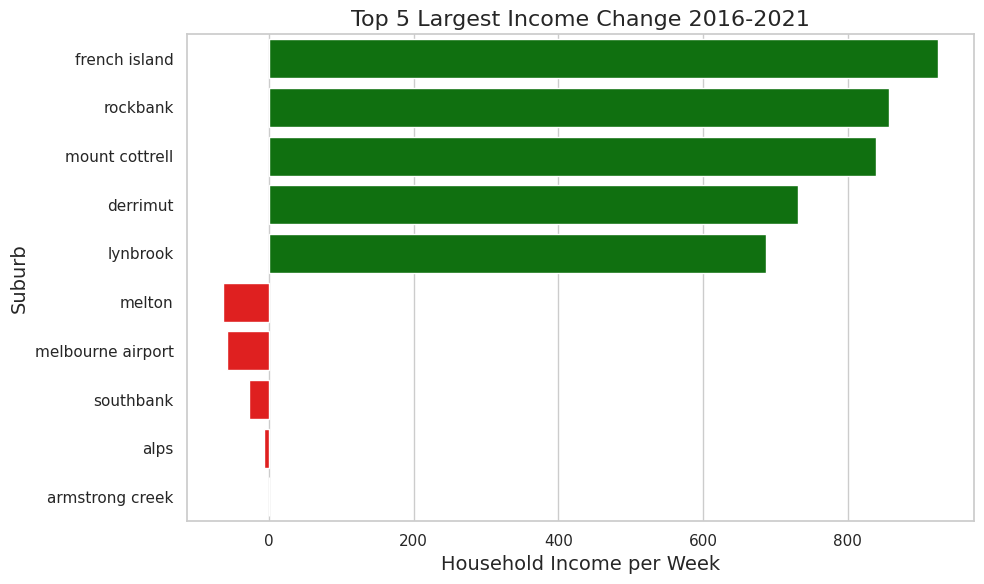

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming result_df is your DataFrame with 'suburb' and 'income_diff' columns

# Sorting the DataFrame by 'income_diff' to get top 5 highest and lowest suburbs
top_5_highest = result_df.nlargest(5, 'income_diff')
top_5_lowest = result_df.nsmallest(5, 'income_diff')

# Concatenating the two DataFrames for visualization
top_5_combined = pd.concat([top_5_highest, top_5_lowest])

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot with Seaborn for a cleaner look
plt.figure(figsize=(10, 6))
sns.barplot(x='income_diff', y='suburb', data=top_5_combined, palette=['green' if x in top_5_highest['suburb'].values else 'red' for x in top_5_combined['suburb']])

# Add title and labels
plt.title('Top 5 Largest Income Change 2016-2021', fontsize=16)
plt.xlabel('Household Income per Week', fontsize=14)
plt.ylabel('Suburb', fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig('../plots/top_5_suburb_income.png')
plt.show()


## Show the income change in a map 

In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt


 
vic_suburbs = gpd.read_file("../data/map/LOCALITY_POLYGON.shp")
# Rename 'GAZLOC' to gazetted locality
vic_suburbs['suburb'] = vic_suburbs['GAZLOC'].str.lower()
# Filter the dataframe to only include the gazetted localities and their geometries
vic_suburbs_filtered = vic_suburbs[['suburb', 'geometry']]

merged_df = pd.merge(result_df, vic_suburbs_filtered, how='inner', on='suburb')
merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

merged_df['geometry'] = merged_df['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
merged_df['income_diff'] = merged_df['income_diff'].round(2)



In [64]:
import geopandas as gpd
import folium
import matplotlib.colors as mcolors
import numpy as np

# Assuming you have a GeoDataFrame with 'suburb', 'income_diff', and 'geometry' columns
gdf_income = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Get the min, max, and zero value
min_diff = merged_df['income_diff'].min()
max_diff = merged_df['income_diff'].max()

# Create a custom colormap with Red for low, Orange for zero, and Green for high
colors_list = ['red', 'orange', 'green']
n_bins = 100  # Number of color bins
cmap_name = 'custom_cmap'

# Custom colormap that transitions through red, orange, and green
custom_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors_list, N=n_bins)

# Normalize the colors between the min and max income_diff values
norm = mcolors.TwoSlopeNorm(vmin=min_diff, vcenter=0, vmax=max_diff)


# Create a base map centered around the approximate location of the geometries (Victoria, Australia)
m = folium.Map(location=[-37.4713, 144.7852], zoom_start=8, tiles=None)

# Add a tile layer with reduced opacity for translucency
folium.TileLayer(
    tiles="https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
    attr='OpenStreetMap',
    name='OpenStreetMap',
    opacity=0.5  # Adjust opacity for translucency
).add_to(m)

# Add polygons from the 'geometry' column to the map
for _, row in gdf_income.iterrows():
    # Get the 'income_diff' value
    income_diff = row['income_diff']
    
    # Create a GeoJson feature for the polygon with dynamic coloring
    geo_json = folium.GeoJson(
        data=row['geometry'].__geo_interface__,
        style_function=lambda x, income_diff=income_diff: {
            'fillColor': get_color(income_diff),  # Color based on the value of 'income_diff'
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5
        }
    )
    
    # Add a popup to show the suburb name and income_diff
    popup = folium.Popup(f'Suburb: {row["suburb"]}<br>Income Difference: {income_diff}', max_width=200)
    geo_json.add_child(popup)
    
    # Add the polygon to the map
    geo_json.add_to(m)

# Get dynamic min and max values from the 'income_diff' column
min_diff = round(merged_df['income_diff'].min(), 2)
max_diff = round(merged_df['income_diff'].max(), 2)

# Create a custom HTML legend with dynamically adjusted min, midpoint, and max labels
legend_html = f"""
<div style="
    position: fixed;
    bottom: 100px;
    left: 50px;
    width: 300px;
    background-color: white;
    z-index:9999;
    font-size: 14px;
    border:2px solid grey;
    border-radius:5px;
    padding: 10px;">
    <div style="font-size: 16px; font-weight: bold;">Weekly Household Income Change</div>
    <div style="display: flex; justify-content: space-between;">
        <span style="font-size: 14pt; font-weight: bold;">{min_diff}</span>
        <span style="font-size: 14pt; font-weight: bold;">0</span>
        <span style="font-size: 14pt; font-weight: bold;">{max_diff}</span>
    </div>
    <div style="height: 10px;
        background: linear-gradient(to right, red, orange, green);">
    </div>
</div> 
"""

# Add the custom HTML legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file
m.save('../plots/map_income_difference.html')
